### MCMC with Weather Observations

Let's build your first Markov Chain! 

You are a real astronomer (not a theory guy like me) and are planning an expensive observational campaign. You want to know how likely it is that tomorrow night will be clear given the weather tonight (clear or cloudy). The key piece of information here is that the weather tomorrow depends on the weather today. From past history, you know that:

$$p({\rm clear \; tomorrow} \, |\,  {\rm cloudy \; today}) = 0.5,$$

which means that

$$p({\rm cloudy \; tomorrow} \, |\, {\rm cloudy \; today}) = 0.5.$$

We also have

$$p({\rm cloudy \; tomorrow} \, |\, {\rm clear \; today}) = 0.1,$$

which means that

$$p({\rm clear \; tomorrow} \, |\, {\rm clear \; today}) = 0.9.$$


- We can start with the sky conditions today and make predictions going forward more and more into the future.
- This will look like a big decision tree. 
- After enough days, we'll reach equilibrium probabilities that have to do with the mean weather statistics (ignoring seasons) and we'll arrive at

$$p({\rm clear}) = 0.83,$$

and 

$$p({\rm cloudy}) = 0.17.$$

You get the same answer for day $N$ as day $N+1$ and it doesn't matter whether it was clear or cloudy on the day that you started. The steps that we have taken in this process are, indeed, a **MARKOV CHAIN**.

Here is an illustration of this process from an article in [towarddatascience.com](https://towardsdatascience.com/introduction-to-markov-chains-50da3645a50d).

![image.png](https://miro.medium.com/max/416/1*frksGjINf5oTjx7WL81U3w.png)

#### Tasks

- Start off on a cloud day. 
- Implement your weather forecast based on the above probabilities
- Run your simulator for N days (with $N\gtrsim 10^4$)
- Prepare a plot with the number of days on the x axis and the cumulative fraction of, say, sunny days over the number of days so far on the y axis. This is called a **trace-plot**, showing how our estimate of $p(\mathrm{clear})$ evolves as the chain samples.  

In [53]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'P(sunny) Over Time')

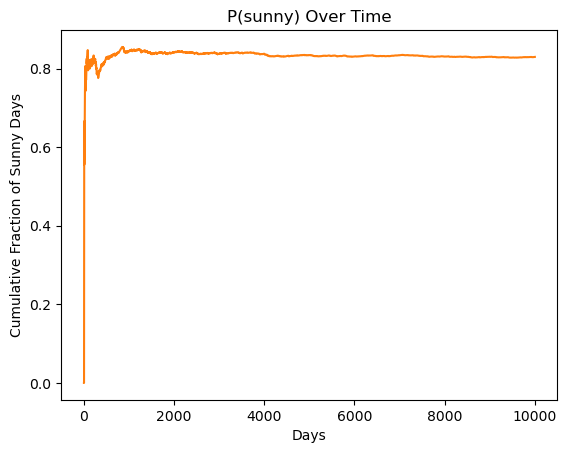

In [ ]:
N = 10000 # Number of days
#rainy = 0 sad
#sunny = 1 happy
current = 0 # current weather

prob_sr = 0.5 # prob(cloudy tomorrow|rainy today)
#prob_rr = 0.5
prob_rs = 0.1
#prob_ss = 0.9

def tomorrow_weather (current_weather, x):
    if current_weather == 0: return 0 if x < prob_sr else 1
    elif current_weather == 1: return 0 if x < prob_rs else 1

var = np.random.uniform(0, 1, N) 

v_weather = []
for n in range(N):
    v_weather.append(tomorrow_weather(current, var[n]))
    current = v_weather[n]

v_days = np.arange(1, N + 1) # Ordered vector of N elements
fraction_sunny = np.cumsum(v_weather)/v_days # Cumulative fraction of sunny days

plt.plot(v_days, fraction_sunny, c='C1') 
plt.xlabel('Days')
plt.ylabel('Cumulative Fraction of Sunny Days')
plt.title('P(sunny) Over Time')

NOTE (from lecture): 
- In MCMC the process must be **stationary** which basically means that the chain statistics look the same no matter which chunk you look at, e.g. first half, second half, or every other point, etc.  
- Obviously that isn't going to be the case in the early steps of the chain. In our example above, after some time the process was stationary, but not in the first few days.
- So, there is a **burn-in** phase that needs to be discarded. How one determines the number of early steps to discard as burn-in is tricky, but ***you should always start with a traceplot of your samples!***

_So my plot seems right_

- Prepare a histogram of the above plot. This reveals the distribution of $p(\mathrm{clear})$.

Text(0, 0.5, 'Frequency')

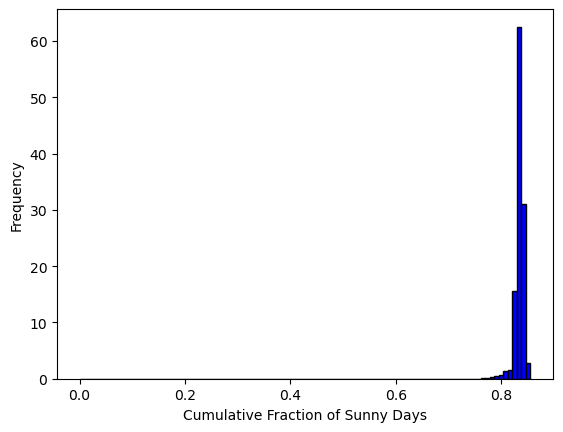

In [55]:
plt.hist(fraction_sunny, bins=round(np.sqrt(N)), density=True, label='original data', color = 'b', edgecolor='black')

plt.xlabel('Cumulative Fraction of Sunny Days')
plt.ylabel('Frequency')

- Use a summary statistics to determine the most likely value and an error on our estimate.

In [63]:
mean = np.mean(fraction_sunny)
std = np.std(fraction_sunny)

print(f"Mean of cumulative fraction of sunny days =", mean)
print(f"Std deviation of cumulative fraction of sunny days =", std)

Mean of cumulative fraction of sunny days = 0.8326338385816151
Std deviation of cumulative fraction of sunny days = 0.020171618536551292


#### Tasks
- In the above example, experiment with chopping off different numbers of initial points as burn-in.

Burn-in		Mean		Std
    10		0.83469		0.00931
   100		0.83459		0.00944
  1000		0.83297		0.01131
  5000		0.82096		0.01847


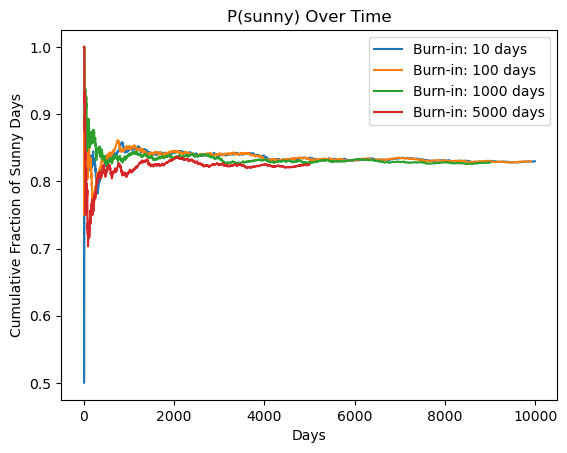

In [ ]:
days_burned = [10, 100, 1000, 5000]

print("Burn-in\t\tMean\t\tStd")
for b in days_burned:
    weather_burned = v_weather[b:] # Burns first b days
    days_burned = np.arange(1, len(weather_burned) + 1) 

    fraction_sunny = np.cumsum(weather_burned)/days_burned # Cumulative fraction of sunny days

    mean = np.mean(fraction_sunny)
    std = np.std(fraction_sunny)
    
    print(f"{b:6d}\t\t{mean:.5f}\t\t{std:.5f}")

    plt.plot(days_burned, fraction_sunny, label=f'Burn-in: {b} days') 

plt.xlabel('Days')
plt.ylabel('Cumulative Fraction of Sunny Days')
plt.title('P(sunny) Over Time')
plt.legend()


#### More
- Redo the same for the Markovian process describing the stock market (see above in this notebook). If you've written your code well, this should require minor modifications:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Finance_Markov_chain_example_state_space.svg/400px-Finance_Markov_chain_example_state_space.svg.png)

Text(0.5, 1.0, 'Goodness of market given Bull=1, Bear=-1, Stagnant=0')

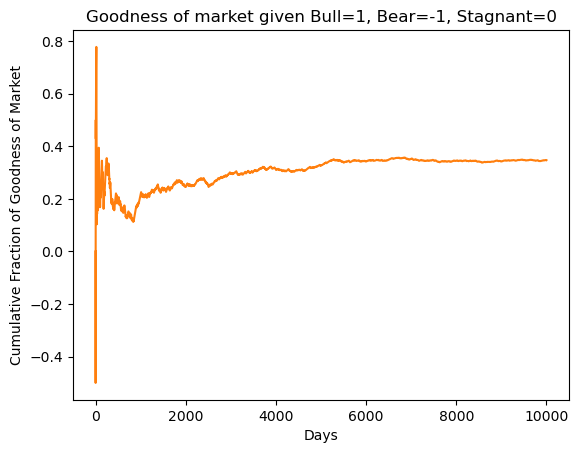

In [89]:
N = 10000 # days

# bullmarket = 1
# stagnantmarket = 0
# bearmarket = -1
current = 0 # My choice spdg

#Prob given bear
p_bull_bear = 0.15 # prob tomorrow is bull market given bear market today
p_stagnant_bear = 0.05
#p_bear_bear = 0.8

#Prob given stagnant
p_bull_stagnant = 0.25
p_stagnant_stagnant =0.5
#p_bear_stagnant =0.25

#Prob given bull
p_bull_bull = 0.9
p_stagnant_bull = 0.025
#p_bear_bull = 0.075

def tomorrow_market (current_market, x):
    if current_market == 0: # stagnant
        if x < p_bull_stagnant: 
            return 1 
        elif x < p_bull_stagnant + p_stagnant_stagnant:
            return 0
        else:
            return -1
        
    elif current_market == 1: # bull
        if x < p_bull_bull: 
            return 1 
        elif x < p_bull_bull + p_stagnant_bull:
            return 0
        else:
            return -1
        
    elif current_market == -1: # bear
        if x < p_bull_bear: 
            return 1 
        elif x < p_bull_bear + p_stagnant_bear:
            return 0
        else:
            return -1
    

var = np.random.uniform(0, 1, N) 

v_market = []
for n in range(N):
    v_market.append(tomorrow_market(current, var[n]))
    current = v_market[n]

v_days = np.arange(1, N + 1) # Ordered vector of N elements
fraction_market = np.cumsum(v_market)/v_days # Cumulative fraction of sunny days

plt.plot(v_days, fraction_market, c='C1') 
plt.xlabel('Days')
plt.ylabel('Cumulative Fraction of Goodness of Market')
plt.title('Goodness of market given Bull=1, Bear=-1, Stagnant=0')

Text(0, 0.5, 'Frequency')

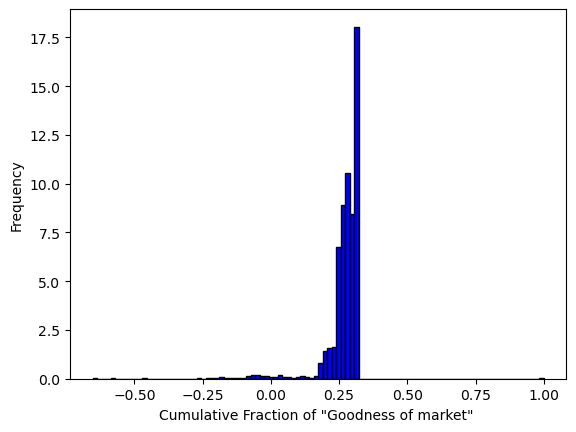

In [87]:
plt.hist(fraction_market, bins=round(np.sqrt(N)), density=True, label='original data', color = 'b', edgecolor='black')
plt.xlabel('Cumulative Fraction of "Goodness of market" ')
plt.ylabel('Frequency')

In [88]:
mean = np.mean(fraction_market)
std = np.std(fraction_market)

print(f"Mean of cumulative fraction of goodness markets =", mean)
print(f"Std deviation of cumulative fraction of goodness market =", std)

Mean of cumulative fraction of goodness markets = 0.2687213823501578
Std deviation of cumulative fraction of goodness market = 0.07477560589069142
